# 分類の精度計算
- $f(x)=1/(1+exp(-(w_0x_0+w_1x_1)))$のロジスティック回帰モデルを考える
- 真のパラメータと評価したいパラメータをそれぞれリストで作成．
- 真のパラメータでランダムにデータを作成．
- 評価したいパラメータで予測クラスを計算．
- コンヒュージョンマトリクスを表す辞書を作成し表示．
- 分類精度，適合率，再現率，F-値を計算し表示．

In [6]:
import random
import math

In [25]:
w_t = [10, 20] # 真のパラメータ
w = [20, 30] # 評価対象のパラメータ

### データ作成
以下のように入力$x_0, x_1$とパラメータ$w_0, w_1$に対するシグモイド関数の値に従ってランダムに出力$y$が1または0の値をとるようなデータを作成し返す関数`generate_data()`を実装してください。関数は真のパラメータ`w_t`、データ数`n`を引数に受け取ります。

$1/(1+exp(-(w_0x_0+w_1x_1)))$

In [26]:
# データを作成
def generate_data(w_t, n):
    X = []
    Y = []
    for i in range(n):
        X.append( (random.random()-0.5, random.random()-0.5) ) # xの値の範囲は[-0.5, 0.5]
        v = w_t[0] * X[i][0] + w_t[1] * X[i][1]
        p = 1/(1+math.exp(-v))
        y = random.choices( [-1,1], weights=[1-p,p])[0]
        Y.append(y)
    return X, Y

以下のセルを実行して関数の動作を確認してください。

In [27]:
n=100
X, Y = generate_data(w_t, n)
print(X[:5])
print(Y[:5])

[(-0.3837054153801386, -0.1686087170919054), (-0.2125199503577977, 0.4661940534477146), (-0.008397133522783373, -0.49744357863150457), (0.024824983226177877, -0.26428226041268), (0.24367842456603228, -0.010329738849962244)]
[-1, 1, -1, -1, 1]


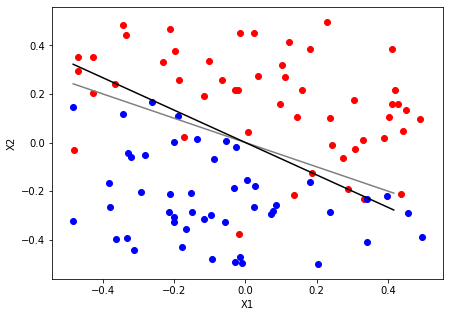

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(X)
y=np.array(Y)

plt.figure(figsize=(7,5))
plt.xlabel('X1')
plt.ylabel('X2');

plt.scatter(x[y==1,0],x[y==1,1],c='red')
plt.scatter(x[y==-1,0],x[y==-1,1],c='blue')

x1=np.arange(x[:,0].min(),x[:,0].max(),0.1)
plt.plot(x1, -w_t[0]*x1/w_t[1], color='gray')
plt.plot(x1, -w[0]*x1/w[1], color='black');

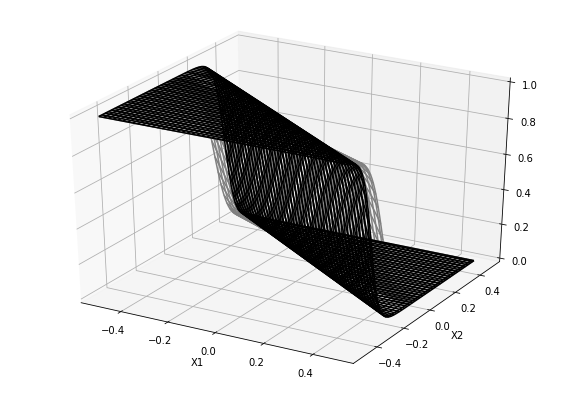

In [54]:
from mpl_toolkits.mplot3d import Axes3D

X1, X2 = np.meshgrid(np.arange(-0.5, 0.5, 0.01), np.arange(-0.5, 0.5, 0.01))
Z_T = 1/(1+np.exp(w_t[0]*X1+ w_t[1]*X2))
Z = 1/(1+np.exp(w[0]*X1+ w[1]*X2))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.plot_wireframe(X1, X2, Z_T, color='gray')
ax.plot_wireframe(X1, X2, Z, color='black');

以下のセルを実行して`True`が出力されるか確認してください。

In [29]:
print(n*2==sum([len(x) for x in X]))
print(n == len(Y))

True
True


### 予測
入力データのリスト`X`と評価対象のパラメータ`w`を引数として受け取り各入力データに対する予測値のリスト`Y_pred`を返す関数`predict()`を実装してください。

In [30]:
# パラメータwで予測
def predict(X,w):
    Y_pred = []
    for x in X:
        y_pred = w[0] * x[0] + w[1] * x[1] 
        if y_pred >= 0:
            y_pred = 1
        else:
            y_pred = -1
        Y_pred.append(y_pred)
    return Y_pred

以下のセルを実行して関数の動作を確認してください。

In [31]:
Y_pred = predict(X, w)
print(Y_pred[:5])

[-1, 1, -1, -1, 1]


以下のセルを実行して`True`が出力されるか確認してください。

In [32]:
print(n==len(predict(X, w)))

True


### コンフュージョンマトリックス（混同行列）
真の出力値のリスト`Y`と予測値のリスト`Y_pred`を受け取りそれらのコンフュージョンマトリックス（混同行列）を辞書として返す関数`confmat()`を実装してください。

In [33]:
# コンフュージョンマトリクス作成
def confmat(Y, Y_pred):
    # (真のクラス，予測クラス)の辞書
    conf = { (-1,-1) : 0, (-1,1) : 0, (1,-1) : 0, (1,1) : 0 }
    for (y, y_pred) in zip(Y, Y_pred):
        conf[(y,y_pred)] += 1
    return conf

以下のセルを実行して関数の動作を確認してください。

In [34]:
conf = confmat(Y,Y_pred)
print(conf)

{(-1, -1): 47, (-1, 1): 2, (1, -1): 9, (1, 1): 42}


以下のセルを実行して`True`が出力されるか確認してください。

In [35]:
print(n == sum([x for x in conf.values()]))

True


### 分類精度
コンフュージョンマトリックスを辞書として受け取り分類の各クラスごとの精度、適合率、再現率、F-値を辞書として返す関数`eval()`を実装してください。

In [36]:
# 分類精度の計算
def eval(conf):
    n = sum([x for x in conf.values()])
    acc = ( conf[(-1,-1)] + conf[(1,1)] )/n

    prec={-1:0, 1:0}
    recall={-1:0, 1:0}
    f_val ={-1:0, 1:0}
    for c in [-1,1]:
        prec[c] = conf[(c,c)] / ( conf[(-1,c)] + conf[(1,c)] )
        recall[c] = conf[(c,c)] / ( conf[(c,-1)] + conf[(c,1)] )
        f_val[c] = 2 * prec[c] * recall[c] / (prec[c] + recall[c])
    return {1:[acc, prec[1], recall[1], f_val[1]], -1:[acc, prec[-1], recall[-1], f_val[-1]]}

以下のセルを実行して関数の動作を確認してください。

In [37]:
for c, evals in eval(conf).items():
    print("クラス{}:　精度={:.2}, 適合率={:.2}, 再現率={:.2}, F-値={:.2}".format( c, evals[0], evals[1], evals[2], evals[3] ) ) 

クラス1:　精度=0.89, 適合率=0.95, 再現率=0.82, F-値=0.88
クラス-1:　精度=0.89, 適合率=0.84, 再現率=0.96, F-値=0.9
